In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mticker
from ibtracs import Ibtracs


/var/folders/9p/47_kp6ns54g0ls7g_zpzn0lh0000gq/T/ipykernel_89114/312219812.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


ModuleNotFoundError: No module named 'ibtracs'

Levi Cowan IBRATCS processing

In [2]:
#file_path = '/Users/jacksonparker/Desktop/Research/Data/ibtracs.since1980.list.v04r00.csv'
#data = np.genfromtxt(file_path, delimiter=',')

I = Ibtracs()


	Progress: [##################################################] 100.0% 
Parsing raw IBTrACS CSV file...
Parsing line 715731
Inserting 346120 rows into database...


In [8]:
tc = I.get_storm_from_name(name='katrina', season=2005, basin='NA')
print(vars(tc).keys())


dict_keys(['ID', 'ATCF_ID', 'name', 'season', 'basin', 'subbasin', 'genesis', 'time', 'basins', 'subbasins', 'agencies', 'lat', 'lon', 'classification', 'wind', 'mslp', 'speed', 'dist2land', 'R34_NE', 'R34_SE', 'R34_SW', 'R34_NW', 'R50_NE', 'R50_SE', 'R50_SW', 'R50_NW', 'R64_NE', 'R64_SE', 'R64_SW', 'R64_NW', 'rmw'])


In [16]:
I.load_all_storms()

Loading all TCs from database...


Load TCs into array and count total storms in period

In [171]:
TCs = []
for i in range(0,41,1):
    TCs += [tc for tc in I.storms if tc.basin == 'NA' and tc.season == 1980 + i
    and tc.intersect_box((32, 37, 282, 286))]

    
TCs.sort(key=lambda tc: tc.genesis)
for tc in TCs:
    ace = tc.ACE(subtropical=True)
    print(f'{tc.name}, genesis={tc.genesis}, ACE={ace:.1f}')

print(len(TCs)) 

NOT_NAMED, genesis=1980-07-22 00:00:00, ACE=0.0
BRET, genesis=1981-06-29 12:00:00, ACE=2.0
DENNIS, genesis=1981-08-07 06:00:00, ACE=6.4
NOT_NAMED, genesis=1982-06-18 00:00:00, ACE=3.0
DEAN, genesis=1983-09-26 18:00:00, ACE=3.6
DIANA, genesis=1984-09-08 12:00:00, ACE=15.2
ISIDORE, genesis=1984-09-25 12:00:00, ACE=3.6
CLAUDETTE, genesis=1985-08-09 18:00:00, ACE=7.2
DANNY, genesis=1985-08-12 00:00:00, ACE=3.5
GLORIA, genesis=1985-09-16 12:00:00, ACE=21.2
HENRI, genesis=1985-09-21 18:00:00, ACE=1.1
ISABEL, genesis=1985-10-07 00:00:00, ACE=3.8
KATE, genesis=1985-11-15 18:00:00, ACE=19.1
ANDREW, genesis=1986-06-05 00:00:00, ACE=2.2
CHARLEY, genesis=1986-08-13 12:00:00, ACE=5.6
ARLENE, genesis=1987-08-10 18:00:00, ACE=11.9
ALBERTO, genesis=1988-08-05 18:00:00, ACE=0.5
BERTHA, genesis=1990-07-24 12:00:00, ACE=7.9
ANA, genesis=1991-07-02 18:00:00, ACE=1.3
BOB, genesis=1991-08-16 00:00:00, ACE=8.0
DANIELLE, genesis=1992-09-22 12:00:00, ACE=2.9
EMILY, genesis=1993-08-22 18:00:00, ACE=22.1
GORDON,

BrianB Method Test

In [70]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

#sys.path.append("/Users/bblanton/GitHub/BrianOBlanton/CHEER-STORM/")
#import cheer_utils

dropcols=['SID','DIST2LAND','LANDFALL','USA_LAT','USA_LON','USA_STATUS','USA_AGENCY','IFLAG',
          'TRACK_TYPE','WMO_AGENCY','WMO_WIND','WMO_PRES','USA_SEAHGT','USA_SEARAD_SW',
          'USA_SEARAD_NW','USA_SEARAD_NE','USA_SEARAD_SE'];

fl='ibtracs.NA.list.v04r00_USA.csv'
df=pd.read_csv(fl,skiprows = [1]).drop(dropcols,axis=1).replace(' ', np.nan)
df.USA_PRES=pd.to_numeric(df.USA_PRES)
df.USA_WIND=pd.to_numeric(df.USA_WIND)
df.USA_RMW=pd.to_numeric(df.USA_RMW)

df.rename(columns={'LAT':'Latitude', 'LON':'Longitude','USA_PRES': 'Min_pres'},inplace=True)

# add an "absolute storm number for keeping track of complete storms
#df['SEASON']*100+df['NUMBER']
ids, df['abssn'] = np.unique(df['USA_ATCF_ID'], return_inverse=True)
df.set_index('abssn',inplace=True)
df.keys()

FileNotFoundError: static/coarse_us_coast.dat not found.

NameError: name 'axx' is not defined

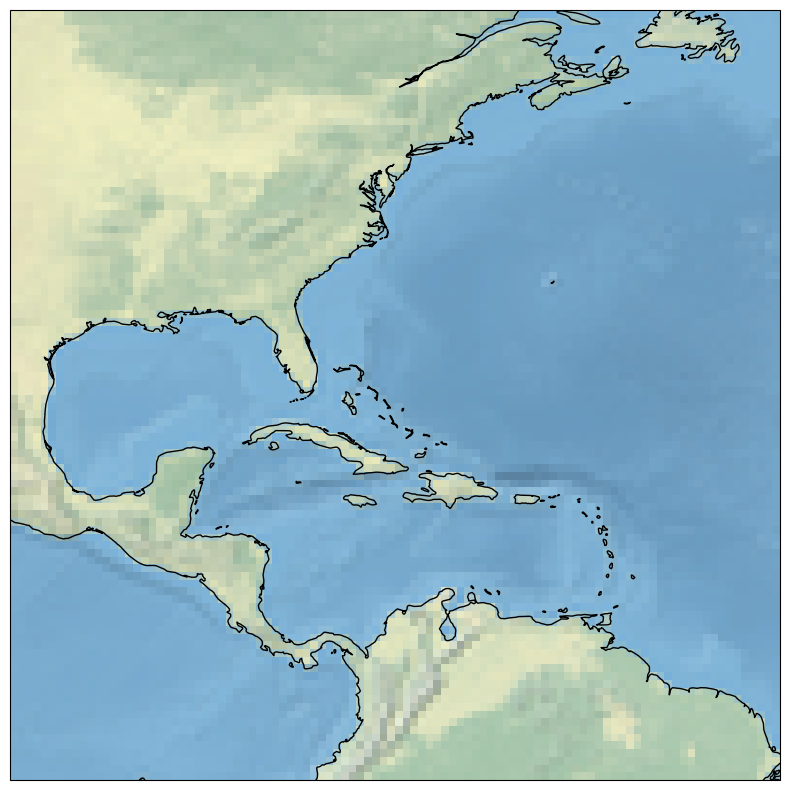

In [68]:
fig = plt.figure(figsize=(16, 10))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
ax.coastlines()
ax.set_xlim([-100, -50])
ax.set_ylim([0, 50])

#df.plot.scatter(x='LON',
#                y='LAT',
#                c='USA_WIND',
#                ax=ax)
for i,idx in enumerate(np.unique(df.index)): 
        x=df.loc[df.index==idx].Longitude
        y=df.loc[df.index==idx].Latitude
        c=df.loc[df.index==idx].Min_pres
        #c=df.loc[df.index==idx].HollandB
        ax.plot(x, y, linewidth=1, color='k')
        #axx.plot(x.iloc[0], y.iloc[0], marker='*', color='g')
        #axx.plot(x.iloc[-1], y.iloc[-1], marker='*', color='r')
        cm=ax.scatter(x=x, y=y, c=c, cmap=cmap, norm=norm, s=36)

In [5]:
# define dicts for filtering circles for case study areas:
a=np.arange(0,370,10)*np.pi/180
rad=3
lo=-76.5
la=34.75
# test track screening circle
# rad= .3
# lo=-77.75
# la=35
nc_circ={'lo': lo,
         'la': la, 
         'rad': rad,
         'cirx': rad*np.cos(a)+lo,
         'ciry': rad*np.sin(a)+la}

rad=3
lo=-94
la=29.5
tx_circ={'lo': lo,
         'la':  la,
         'rad': rad,
         'cirx': rad*np.cos(a)+lo,
         'ciry': rad*np.sin(a)+la}
         
df['dist2nc']=np.sqrt(np.square(df['LON']-nc_circ['lo']) + np.square(df['LAT']-nc_circ['la']))
df['dist2tx']=np.sqrt(np.square(df['LON']-tx_circ['lo']) + np.square(df['LAT']-tx_circ['la']))


In [6]:
df

,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,USA_ATCF_ID,...,USA_R64_SW,USA_R64_NW,USA_POCI,USA_ROCI,USA_RMW,USA_EYE,STORM_SPEED,STORM_DIR,dist2nc,dist2tx
0,1950,58,NaN,NaN,ABLE,1950-08-12 03:00:00,TS,17.4176,-55.8722,AL011950,...,NaN,NaN,NaN,NaN,NaN,NaN,10,308,26.942870,39.996419
1,1950,58,NaN,NaN,ABLE,1950-08-12 06:00:00,TS,17.7000,-56.3000,AL011950,...,NaN,NaN,NaN,NaN,NaN,NaN,10,300,26.433738,39.503544
2,1950,58,NaN,NaN,ABLE,1950-08-12 09:00:00,TS,17.9350,-56.8204,AL011950,...,NaN,NaN,NaN,NaN,NaN,NaN,12,296,25.884955,38.936768
3,1950,58,NaN,NaN,ABLE,1950-08-12 12:00:00,TS,18.2000,-57.4000,AL011950,...,NaN,NaN,NaN,NaN,NaN,NaN,13,300,25.272762,38.304699
4,1950,58,NaN,NaN,ABLE,1950-08-12 15:00:00,TS,18.5622,-57.9778,AL011950,...,NaN,NaN,NaN,NaN,NaN,NaN,14,305,24.599121,37.646173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30103,2023,80,NaN,CS,NOT_NAMED,2023-11-17 12:00:00,NR,17.0364,-79.8000,AL222023,...,NaN,NaN,1008,240,100.0,NaN,15,49,18.018369,18.893949
30104,2023,80,NaN,CS,NOT_NAMED,2023-11-17 15:00:00,NR,17.4991,-79.1718,AL222023,...,NaN,NaN,1007,240,150.0,NaN,16,52,17.456577,19.076088
30105,2023,80,NaN,CS,NOT_NAMED,2023-11-17 18:00:00,NR,18.0000,-78.5000,AL222023,...,NaN,NaN,1007,240,200.0,NaN,17,49,16.868980,19.300259
30106,2023,80,NaN,CS,NOT_NAMED,2023-11-17 21:00:00,NR,18.6166,-77.8437,AL222023,...,NaN,NaN,1007,240,175.0,NaN,18,43,16.189260,19.480103


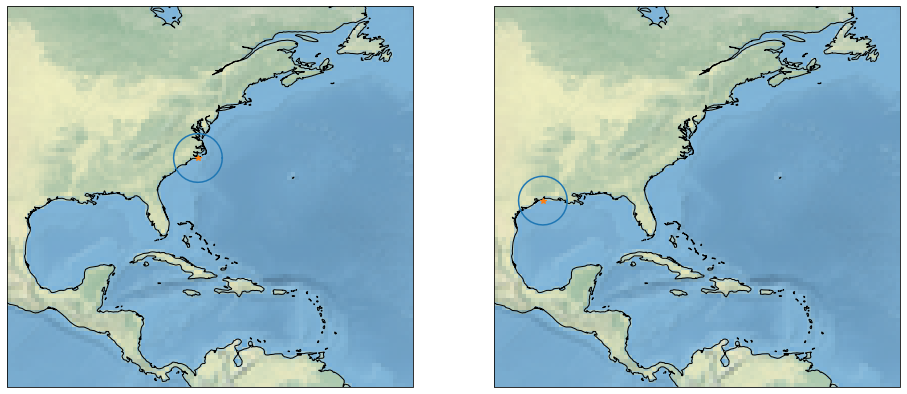

In [131]:
fig, ax = plt.subplots(nrows=1,ncols=2,
                           subplot_kw={'projection': ccrs.PlateCarree()},
                           figsize=(16,7))
ax=ax.flatten()
    
ax[0].stock_img()
ax[0].coastlines()
ax[1].stock_img()
ax[1].coastlines()
    
ax[0].plot(nc_circ['cirx'],nc_circ['ciry'],transform=ccrs.PlateCarree())
ax[1].plot(tx_circ['cirx'],tx_circ['ciry'],transform=ccrs.PlateCarree())

ax[0].plot(nc_circ['lo'],nc_circ['la'],marker='*',transform=ccrs.PlateCarree())
ax[1].plot(tx_circ['lo'],tx_circ['la'],marker='*',transform=ccrs.PlateCarree())

for i in range(0,2):
    ax[i].axis('equal')
    ax[i].set_ylim([10, 50])
    ax[i].set_xlim([-100, -50])
    ax[i].grid(True)

In [30]:
# Find the storm index numbers (anssn) that pass thru the screening circles
# This gets the parts of tracks that enter the circles.  The complete track will be extracted below
df_nc=df.loc[(df['dist2nc'] <= nc_circ['rad']) & (df['SEASON'] >= 1980) & (df['SEASON'] <= 2020)]
df_nc.reset_index(inplace=True)
df_nc.drop(columns=['BASIN','SUBBASIN'],inplace=True)

#df_tx=df.loc[(df['dist2tx'] <= tx_circ['rad'])]# & (df['Min_pres'] <= 980)]
# df_nc=df.loc[(df['dist2nc'] <=nc_circ['rad']) & (df['Category'] > 2)]
# df_tx=df.loc[(df['dist2tx'] <=tx_circ['rad']) & (df['Category'] > 2)]
#idx_nc=np.unique(df_nc.index).astype(int)

a,idx_nc = np.unique(df_nc.USA_ATCF_ID, return_index=True)
#idx_tx=np.unique(df_tx.index).astype(int)

print(f'Initial number of NC events = {len(idx_nc)}')
print(idx_nc)
#print(f'Initial number of TX events = {len(idx_tx)}')
df_nc.drop(columns=['BASIN','SUBBASIN'],inplace=True)
df_nc

Initial number of NC events = 24
[  0   5  14 172  44  39  69 122   3 159 138 180  72  86 194 118  93 199
 110 155 167 200 168 208]


/var/folders/9p/47_kp6ns54g0ls7g_zpzn0lh0000gq/T/ipykernel_89114/3369815740.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nc.drop(columns=['BASIN','SUBBASIN'],inplace=True)


,index,SEASON,NUMBER,NAME,ISO_TIME,NATURE,LAT,LON,USA_ATCF_ID,USA_RECORD,...,USA_R64_SW,USA_R64_NW,USA_POCI,USA_ROCI,USA_RMW,USA_EYE,STORM_SPEED,STORM_DIR,dist2nc,dist2tx
0,18252,2013,24,ANDREA,2013-06-07 18:00:00,ET,35.2000,-78.6000,AL012013,NaN,...,NaN,NaN,1005,150,120.0,NaN,25,41,2.147673,16.421023
1,18253,2013,24,ANDREA,2013-06-07 21:00:00,ET,36.2401,-77.4733,AL012013,NaN,...,NaN,NaN,1005,150,120.0,NaN,29,41,1.779806,17.848271
2,18254,2013,24,ANDREA,2013-06-08 00:00:00,ET,37.4000,-76.2000,AL012013,NaN,...,NaN,NaN,1005,150,120.0,NaN,31,40,2.666927,19.474342
3,18428,2013,36,DORIAN,2013-08-04 03:00:00,DS,32.1092,-76.4664,AL042013,NaN,...,NaN,NaN,1017,100,50.0,NaN,15,66,2.641014,17.726676
4,18429,2013,36,DORIAN,2013-08-04 06:00:00,DS,32.4000,-75.6000,AL042013,NaN,...,NaN,NaN,1017,100,50.0,NaN,16,68,2.516446,18.627131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,25229,2020,67,OMAR,2020-09-01 12:00:00,TS,34.6000,-73.7000,AL152020,NaN,...,NaN,NaN,1013,100,60.0,NaN,13,59,2.804015,20.930838
208,26190,2020,102,ETA,2020-11-13 06:00:00,TS,32.7000,-78.0000,AL292020,NaN,...,NaN,NaN,1012,200,60.0,NaN,22,62,2.540177,16.316862
209,26191,2020,102,ETA,2020-11-13 09:00:00,TS,33.3276,-76.7186,AL292020,NaN,...,NaN,NaN,1012,200,60.0,NaN,26,60,1.439100,17.700206
210,26192,2020,102,ETA,2020-11-13 12:00:00,ET,34.0000,-75.3000,AL292020,NaN,...,NaN,NaN,1012,200,60.0,NaN,26,61,1.415097,19.233824


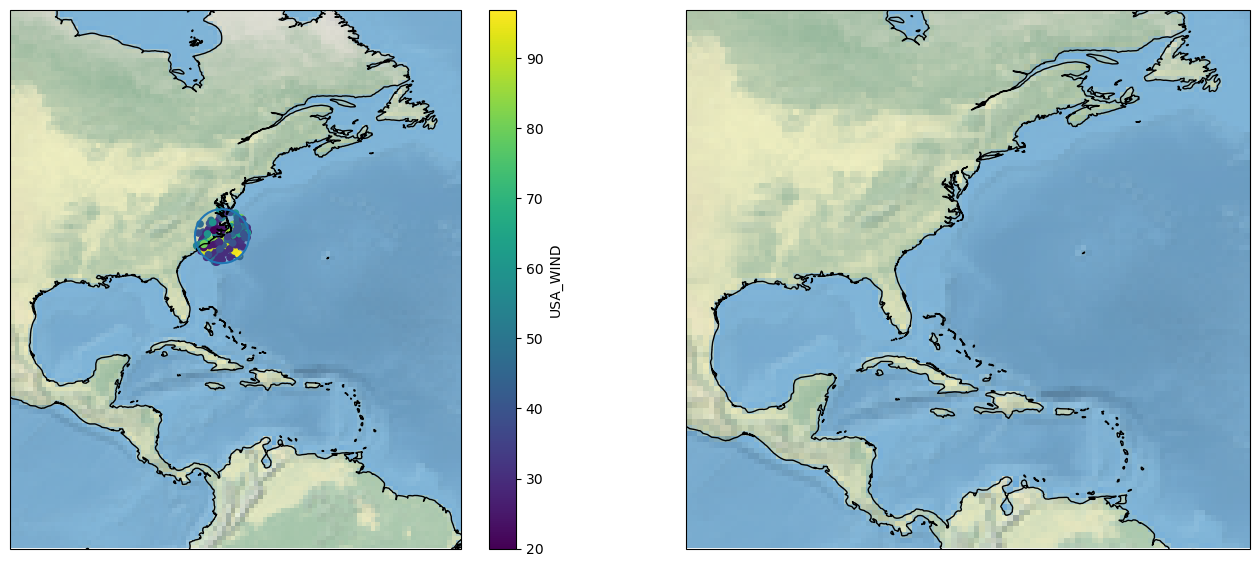

In [33]:
fig, ax = plt.subplots(nrows=1,ncols=2,
                           subplot_kw={'projection': ccrs.PlateCarree()},
                           figsize=(16,7))
ax=ax.flatten()
    
ax[0].stock_img()
ax[0].coastlines()
ax[1].stock_img()
ax[1].coastlines()
    
ax[0].plot(nc_circ['cirx'],nc_circ['ciry'],transform=ccrs.PlateCarree())
df_nc.plot.scatter(x='LON',
                y='LAT',
                c='USA_WIND',
                ax=ax[0])

for i in range(0,2):
    ax[i].axis('equal')
    ax[i].set_ylim([10, 50])
    ax[i].set_xlim([-100, -50])
    ax[i].grid(True)